# Metadata

```
Course:   DS 5100
Module:   M06 NumPy
Topic:    NumPy First Steps -- Continued
Author:   R.C. Alvarado (adapted)
Date:     26 June 2022
```

# Quick Refresher on Shape

The shape of an array is represented a tuple, e.g. `(n, m)` for a 2D array.

* The **length** of the tuple is number of **dimensions** (axes).
* The **values** of the tuple are the number of **elements** in each dimension (axis).

Consider the array `foo`:

In [2]:
# foo = np.ones((6,4))
# foo

It was created with the $2$ dimensions.
* The first dimension, axis 0, has $6$ elements. In this case, these elements are arrays.
* The second dimension, axis 1, has $4$ elements. Its elements are integers.

The shape of `foo[0]` is $4$. It contains $1$ axis with $4$ elements, which are integers.

In [3]:
# foo[0], foo[0].shape

NameError: name 'foo' is not defined

It has a shape of $1$ and not $4 \times 1$ because it is a vector, not a matrix.

**SO, there is a difference between a vector and a 1-column matrix.**

If we want to make it into a 1-column matrix, we need to reshap it using `np.reshape()`.

Note that the first value of the shape argument is $-1$. This means use the length of the vector that is passed to it. 

In [ ]:
# foo2 = np.reshape(foo[0], (-1, 1))

In [ ]:
# foo2, foo2.shape

When indexing an array, think of the **positions** of the comma-delimitted tuple as the axis.  

The **values** are the **element offsets** in the containing array. The

In [ ]:
# foo[2:, 2:]
#   ^   ^ 
#   0   1.  <- AXIS NUMBER

Sometimes, you need to convert vectors into 1-column matrices to make certain linear algebraic functions work.

Consider two random variables, $x$ and $y$. 

In [5]:
import numpy as np

In [6]:
x = np.random.randn(100)
y = np.random.randn(100)

We can fit a regression line using the **normal equation**, which you saw in last night's homework.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$ 

Here is a standward way of expressing it in NumPy:

In [7]:
get_beta1 = lambda x, y: (np.linalg.inv(x.T.dot(x))) * (x.T.dot(y))

However, it will fail if we pass it our two arguments.

The reason is that it expects `x` to be a matrix, since it is designed to handle n-dimension predictor variables, usually represented as $\textbf{X}$. 

In [8]:
get_beta1(x, y)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

The revised function will work with a vector as `x`:

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

In [ ]:
get_beta2 = lambda x, y: (1 / x.T.dot(x)) * (x.T.dot(y))

In [ ]:
get_beta2(x, y)

We can fix the problem in the general case by converting our vector into a matrix using `np.reshape()`.

In [ ]:
x_as_matrix = np.reshape(x, (-1, 1))
# y_as_matrix = np.reshape(y, (-1, 1)) # Not necessary

In [ ]:
get_beta1(x_as_matrix, y)

In [ ]:
get_beta1(x_as_matrix, y)[0][0]

In [ ]:
get_beta1(x_as_matrix, y)[0][0] == get_beta2(x, y)

# Array-Oriented Programming

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions **without writing loops**. 

This practice of **replacing explicit loops with array expressions** is referred to by some people as **vectorization**. 

Vectorized array operations are often significantly **faster** than their pure Python equivalents.

They are also **visually concise and elegant**, although loops have the virtue of visualizing what's under the hood in an algorithm.

## Example

As a simple example, suppose we wished to evaluate the function $sqrt(x^2 + y^2)$ across a regular grid of values. 

The `numpy.meshgrid()` function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [9]:
import numpy as np

In [10]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [11]:
# points

In [12]:
xs, ys = np.meshgrid(points, points)

In [13]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [14]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would write with two points:

In [15]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Then you can used Matplot lib to visualize results.

As part of the NumPy stack, Matplotlib takes NumPy arrays as arguments.

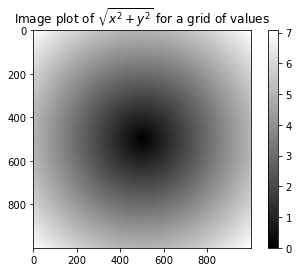

In [16]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.draw()

In [17]:
plt.close('all')

# Expressing Conditional Logic as Array Operations

## `np.where()`

The `np.where` function is a vectorized version of the ternary expression `x if condition else y`. 

Suppose we had a boolean array and two arrays of values:

In [18]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [19]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Here is the vectorized version:

In [20]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [21]:
arr = np.random.randn(4, 4)
arr

array([[-0.79231133,  1.87954248, -1.11293258, -0.46711224],
       [-0.45480051,  0.13467116, -0.36613966,  1.0127256 ],
       [-0.51259994, -0.27597227, -1.62930801,  1.93772318],
       [-0.77505772,  0.93817358, -0.98291669, -0.46106905]])

In [22]:
arr > 0
np.where(arr > 0, 2, -2)

array([[-2,  2, -2, -2],
       [-2,  2, -2,  2],
       [-2, -2, -2,  2],
       [-2,  2, -2, -2]])

In [23]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.79231133,  2.        , -1.11293258, -0.46711224],
       [-0.45480051,  2.        , -0.36613966,  2.        ],
       [-0.51259994, -0.27597227, -1.62930801,  2.        ],
       [-0.77505772,  2.        , -0.98291669, -0.46106905]])

# Mathematical and Statistical Methods

Statistical computations are aggregate functions apply to vectors within an array.

In a 2D array, they can be applied to rows or columns, i.e. axis $0$ or axis $1$.

Let's create an array of random values. We can think of it is a table of observations and random variables.

In [24]:
arr = np.random.randn(5, 4)
arr

array([[-1.15175394,  0.65903381,  0.88879672, -1.17314587],
       [-1.40407852,  1.45581217, -2.2357246 ,  0.49253014],
       [-0.26187955,  1.76402111,  0.57608882,  0.45507887],
       [ 2.60760364,  0.3892215 , -0.72507324, -0.5975412 ],
       [ 0.92495132, -0.94166247,  1.17546701, -0.83664335]])

## `.mean()`

In [25]:
arr.mean()

0.1030551187638415

In [26]:
np.mean(arr)

0.1030551187638415

In [27]:
# arr.mean(axis=1)

## `.sum()`

In [28]:
arr.sum()

2.06110237527683

Row wise aggregration

In [29]:
arr.mean(axis=1)

array([-0.19426732, -0.4228652 ,  0.63332731,  0.41855268,  0.08052813])

Column-wise aggregration

In [30]:
arr.sum(axis=0)

array([ 0.71484295,  3.32642612, -0.3204453 , -1.6597214 ])

## `.cumsum()`

In [31]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [32]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [33]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [34]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

# Methods for Boolean Arrays

## `.sum()`

Since booleans are $0$s and $1$, we can sum them to get a total truth count.

In [35]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

56

In [36]:
bools = np.array([False, False, True, False])

## `.any()`

In [37]:
bools.any()

True

## `.all()`

In [38]:
bools.all()

False

# Sorting 

## `.sort()`

In [39]:
arr = np.random.randn(6)
arr

array([ 0.85496163,  0.55839533,  0.57717957, -1.25373286, -0.76047216,
        0.66089756])

In [40]:
arr.sort()
arr

array([-1.25373286, -0.76047216,  0.55839533,  0.57717957,  0.66089756,
        0.85496163])

In [41]:
arr = np.random.randn(5, 3)
arr

array([[ 1.48569206,  0.36860672, -0.47219636],
       [-1.1274741 ,  0.74103936, -1.0346077 ],
       [-0.25160592, -0.53353792,  0.05765988],
       [-0.02296949, -1.7625164 ,  1.30827916],
       [-0.98588986, -0.83083552, -0.51177523]])

In [42]:
arr.sort(1)
arr

array([[-0.47219636,  0.36860672,  1.48569206],
       [-1.1274741 , -1.0346077 ,  0.74103936],
       [-0.53353792, -0.25160592,  0.05765988],
       [-1.7625164 , -0.02296949,  1.30827916],
       [-0.98588986, -0.83083552, -0.51177523]])

In [43]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.490191263620112

In [44]:
0.05 * len(large_arr)

50.0

# Unique and Other Set Logic

## `np.unique()`

In [45]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [46]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [47]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

## `np.in1d()`

Tests whether each element of a 1-D array is also present in a second array.

In [48]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

# File Input and Output with Arrays

## `np.save()`

Save an array to a binary file in NumPy ``.npy`` format.

Automatically adds the `.npy` file extension.

In [49]:
arr = np.arange(10)
np.save('some_array', arr)

## `np.load()`

In [50]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## `np.savetxt()`

Save an array to a text file.

In [51]:
# np.savetxt?

In [52]:
np.savetxt('some_array.txt', arr)

In [53]:
!more some_array.txt

0.000000000000000000e+00
1.000000000000000000e+00
2.000000000000000000e+00
3.000000000000000000e+00
4.000000000000000000e+00
5.000000000000000000e+00
6.000000000000000000e+00
7.000000000000000000e+00
8.000000000000000000e+00
9.000000000000000000e+00
>rray.txt (END)

## `np.savez()`

Save several arrays into a single file in uncompressed ``.npz`` format.

In [90]:
np.savez('array_archive.npz', a=arr, b=arr)

In [91]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

Clean up ...

In [93]:
!rm some_array.npy
!rm some_array.txt
!rm array_archive.npz
!rm arrays_compressed.npz

rm: some_array.npy: No such file or directory
rm: some_array.txt: No such file or directory


# Linear Algebra

## `.dot()`

Dot product of two arrays. Specifically,
- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).
- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using `matmul()` or `a @ b` is preferred.
- If either `a` or `b` is 0-D (scalar), it is equivalent to `multiply()`
  and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.
- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.
- If `a` is an N-D array and `b` is an M-D array (where `M>=2`), it is a
  sum product over the last axis of `a` and the second-to-last axis of `b`:
  
```
    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
```

In [94]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [95]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [96]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [97]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [98]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In NumPy, the `@` operator means [matrix multiplication](https://www.codingem.com/numpy-at-operator/).

In [99]:
x @ np.ones(3)

array([ 6., 15.])

## `np.linalg.inv()`

In [100]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 3.0543213 ,  2.45408005, -1.84216118,  0.31935251,  4.25740243],
       [ 2.45408005,  2.85698239, -1.5764048 ,  0.36320355,  4.16817774],
       [-1.84216118, -1.5764048 ,  1.36817961, -0.01207025, -2.61362078],
       [ 0.31935251,  0.36320355, -0.01207025,  0.94644758,  1.09966432],
       [ 4.25740243,  4.16817774, -2.61362078,  1.09966432,  7.21186851]])

In [101]:
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[-4.36301392, -2.57092211, -2.26076916, -1.95752969,  3.60205026],
       [ 0.        , -3.90106846,  4.34017819, -4.00110422,  4.49578819],
       [ 0.        ,  0.        , -4.14428022,  2.48595971, -1.90735459],
       [ 0.        ,  0.        ,  0.        , -1.07652293,  0.13380659],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.10230186]])

# Pseudorandom Number Generation

## `np.random.normal()`

In [102]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.26002052, -0.05530916,  0.42646496,  0.35893564],
       [-0.42964521,  1.28742411, -0.87700751,  0.79203959],
       [-0.34303659,  0.4652078 , -0.53229837,  0.38616176],
       [-1.68121447,  1.1213209 ,  0.04746334,  0.04131689]])

In [103]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

666 ms ± 48.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
23.1 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [104]:
np.random.seed(1234)

In [105]:
rng = np.random.RandomState(1234)

In [106]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## Example: Random Walks

Let simulate a random walk. The walk will be represented as a vector.

We'll do it first as loop, then with vectorization.

**Loops**

In [107]:
import random
position = 0
walk = [position] # initialize the walk
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1  # Coin toss
    position += step
    walk.append(position)

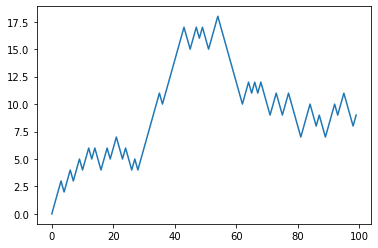

In [108]:
plt.figure()
plt.plot(walk[:100]);

**Vectors**

In [109]:
np.random.seed(12345)

In [110]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk2 = steps.cumsum()

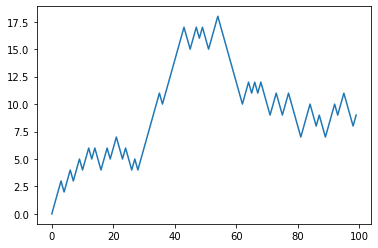

In [111]:
plt.plot(walk[:100]);

In [112]:
walk2.min(), walk2.max()

(-3, 31)

## Simulating Many Random Walks at Once

In [113]:
nwalks = 5000
nsteps = 1000

In [113]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [114]:
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [125]:
walks.max(), walks.min()

(138, -133)

In [116]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [117]:
hits30.sum() # Number that hit 30 or -30

3410

In [118]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [119]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

Feel free to experiment with other distributions for the steps other than equal-sized coin flips. You need only use a different random generator method, like standard_normal to generate normally distributed steps with some mean and standard deviation:

In [120]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps)) # Walks: observations, Steps: features

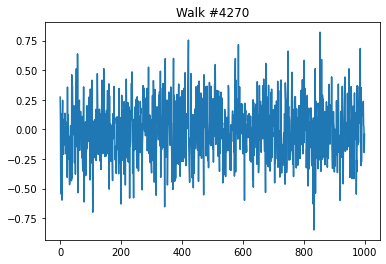

In [121]:
sample_walk = np.random.choice(len(draws))
plt.plot(draws[sample_walk])
plt.title(f"Walk #{sample_walk}");

# Speed of Vectorized Functions

Create some sample data ...

In [122]:
my_arr = np.arange(1000000)

**Using a comprehension**

In [123]:
my_list = list(range(1000000))
%time for _ in range(10): [x * 2 for x in my_list]

CPU times: user 661 ms, sys: 189 ms, total: 850 ms
Wall time: 857 ms


**Using vectorization**

In [124]:
%time for _ in range(10): my_arr * 2

CPU times: user 15 ms, sys: 4.15 ms, total: 19.1 ms
Wall time: 17.3 ms
